**Capstone Project Module 3**

**Nama : Yohanna Inawati Santoso**

**Dataset : Bike Sharing**

[Sumber data](https://drive.google.com/drive/folders/1Qk9VJXpVlYnZofzRmH5z15Kpi-5M8KOv) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing (Data Cleaning, Feature Selection, Feature Engineering)
4. Modeling (Algorithm, Evaluation Metrics)
5. Conclusion
6. Recommendation / Improvement

****

## **Business Problem Understanding**

**Context**

Bike sharing merupakan sistem persewaan sepeda dimana sepeda dapat disewa baik oleh penyewa yang telah menjadi member maupun yang belum menjadi member. Pada beberapa sistem Bike sharing, penyewa dapat menyewa sebuah sepeda dari satu lokasi station, dan mengembalikannya pada station lain yang lokasinya berbeda namun masih dalam satu sistem.

Data yang digunakan dalam project ini adalah data kondisi cuaca, musim, tanggal dan jam, serta total penyewa. Dari data tersebut, dapat dipelajari dan dianalisis keterkaitan antar fitur, sehingga dapat diperoleh metode untuk memprediksi perkiraan sepeda yang diperlukan pada waktu dengan kondisi tertentu.

**Problem Statement**

Dari dataset tersebut, dapat dilihat bahwa terdapat tantangan bagi perusahaan penyedia layanan Bike sharing yaitu berapa banyak unit sepeda yang perlu disiapkan pada waktu tertentu.

**Goals**

Berdasarkan permasalahan tersebut, diperlukan adanya suatu tools yang dapat memprediksi perkiraan penyewa pada waktu dan kondisi tertentu sehingga penyedia layanan Bike sharing dapat menentukan total unit sepeda yang harus dipersiapkan untuk masa mendatang.

**Analytic Approach**

Untuk mencapai tujuan tersebut, pada project ini akan dilakukan proses analisis data untuk dapat menemukan pola dari fitur - fitur yang ada, yang memberikan informasi Bike sharing pada tanggal dan jam tertentu.

Selanjutnya, akan dibangun model regresi yang akan membantu penyedia layanan Bike sharing untuk memprediksi perkiraan total penyewa pada waktu tertentu.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah MAE, MAPE, dan RMSE. Semakin mendekati nol nilai MAE, MAPE, dan RMSE yang dihasilkan, berarti model semakin akurat dalam memprediksi total penyewa sesuai dengan limitasi fitur yang digunakan.

MAE adalah metrik sederhana yang menghitung selisih absolut antara hasil aktual dan hasil prediksi, cocok digunakan jika Y memiliki variance yang kecil, dan terdapat banyak outliers pada residual. 

MAPE adalah rataan persentase error yang dihasilkan oleh model regresi, cocok digunakan jika ingin mengukur performa model berdasarkan error relative dan dapat digunakan untuk data dengan banyak outliers. 

RMSE adalah akar dari selisih kuadrat hasil prediksi dan hasil aktual, cocok digunakan jika variance dan rentang nilai target tidak terlalu besar dan memiliki sedikit outliers.

## **Data Understanding**

- Dataset yang akan digunakan merupakan data rental sepeda pada tahun 2011 - 2012.
- Setiap baris data merepresentasikan informasi terkait penyewaan sepeda pada jam dan tanggal tertentu.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | Float | Normalized humidity. The values are divided to 100 (max) |
| weathersit | Integer | Weather Situation. Details : |
| | | 1: Clear, Few clouds, Partly cloudy |
| | | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
| | | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
| | | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | Whether the day is considered a holiday |
| season | Integer | 1 = spring, 2 = summer, 3 = fall, 4 = winter |
| atemp | Float | "Feels like" temperature in Celsius |
| temp | Float | Temperature in Celsius |
| hr | Integer | Hour (0 to 23) |
| casual | Integer | Number of non-registered user rentals initiated |
| registered | Integer | Number of registered user rentals initiated |
| cnt | Integer | Number of total rentals (include both casual and registered) |

<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


**Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


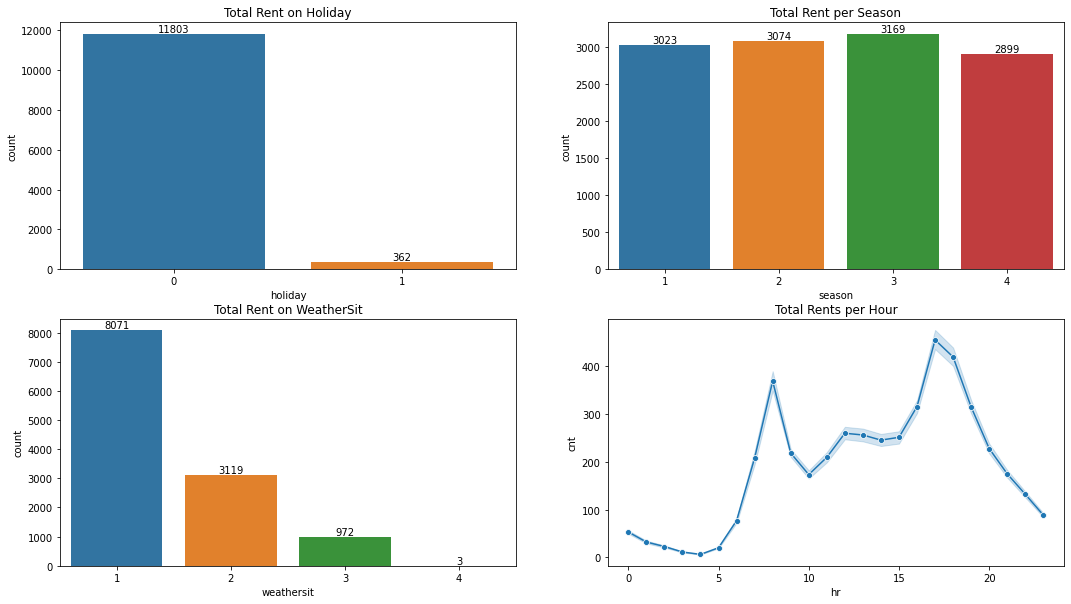

In [4]:
plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
ax = sns.countplot(df['holiday'])
ax.bar_label(ax.containers[0])
plt.title('Total Rent on Holiday', size = 12)

plt.subplot(2,2,2)
ax = sns.countplot(df['season'])
ax.bar_label(ax.containers[0])
plt.title('Total Rent per Season', size = 12)

plt.subplot(2,2,3)
ax = sns.countplot(df['weathersit'])
ax.bar_label(ax.containers[0])
plt.title('Total Rent on WeatherSit', size = 12)

plt.subplot(2,2,4)
sns.lineplot(data=df, x='hr', y='cnt', marker='o')
plt.title('Total Rents per Hour', size = 12)

plt.show()

Dari 12165 data, terdapat 11803 data yang diperoleh pada hari kerja dan 362 data pada hari libur.
Total persewaan tertinggi terdapat pada season fall, diikuti summer, spring dan winter.
Sepeda banyak disewa saat kondisi cuaca cerah hingga berawan, namun sangat sedikit yang menyewa saat cuaca hujan deras, bersalju, badai, dan berkabut.
Jam efektif persewaan adalah pada jam 6 hingga 23. Persewaan sering terjadi pada jam 8, 16, 17, 18, 19.

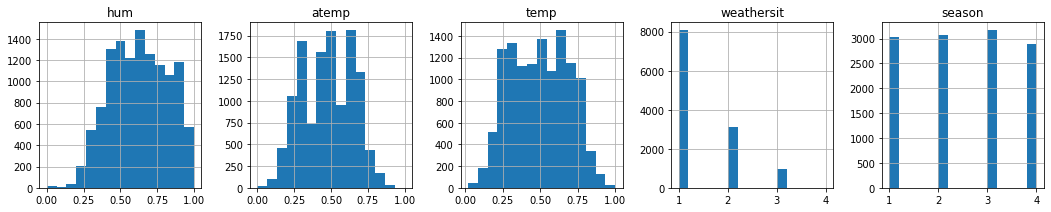

In [5]:
# Histogram data numeric

numerical = ['hum', 'atemp', 'temp', 'weathersit', 'season']
df[numerical].hist(bins=15, figsize=(18, 7), layout=(2, 5));

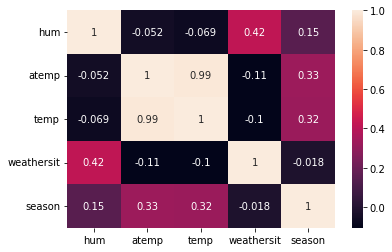

In [6]:
sns.heatmap(df[numerical].corr(), annot=True)
plt.show()

In [7]:
(df['temp']-df['atemp']).mean()

0.021188721742704496

Fitur temp dan atemp memiliki korelasi yang sangat tinggi. Keduanya juga merepresentasikan temperatur pada jam tersebut sehingga dapat digunakan salah satunya saja. Humidity juga cukup memiliki korelasi dengan weather situation.

## **Data Preprocessing**

Pada tahap data preprocessing, akan dilakukan cleaning data. Dataset yang sudah bersih akan digunakan untuk proses analisis lebih lanjut. Pada tahap ini, akan dilakukan :

 - Menghapus data duplicate.
 - Jika terdapat kesalahan tipe data, akan diubah ke tipe yang seharusnya.
 - Drop fitur yang tidak memiliki relevansi terhadap masalah yang sedang dihadapi.
 - Add fitur yang kemungkinan memiliki relevansi terhadap masalah yang sedang dihadapi.
 - Jika terdapat missing value, perlu dilakukan treatment yang sesuai (Drop fitur, imputasi dengan nilai yang sesuai, drop data, etc).
 - Jika terdapat outlier, perlu dilakukan treatment yang sesuai.
 
Untuk proses data preprocessing dan feature engineering, akan digunakan dataframe duplikasi dari dataframe yang sebelumnya digunakan.

In [8]:
# Membuat duplikasi dataframe
df_model = df.copy()

**Add Feature**

In [9]:
# Menambahkan month, year, dayname dari fitur dteday
month=[]
year=[]
dayname=[]
df_model['month'] = pd.to_datetime(df_model['dteday']).dt.month
df_model['year'] = pd.to_datetime(df_model['dteday']).dt.year
df_model['dayname'] = pd.to_datetime(df_model['dteday']).dt.day_of_week

In [10]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([
        col, 
        df_model[col].dtype, 
        df_model[col].isna().sum(), 
        round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
        df_model[col].nunique(), 
        list(df_model[col].drop_duplicates().sample(2).values)
    ]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2012-04-16, 2012-05-12]"
1,hum,float64,0,0.0,89,"[0.49, 0.68]"
2,weathersit,int64,0,0.0,4,"[2, 1]"
3,holiday,int64,0,0.0,2,"[0, 1]"
4,season,int64,0,0.0,4,"[4, 1]"
5,atemp,float64,0,0.0,65,"[0.1515, 0.4697]"
6,temp,float64,0,0.0,50,"[0.58, 0.92]"
7,hr,int64,0,0.0,24,"[6, 7]"
8,casual,int64,0,0.0,305,"[270, 165]"
9,registered,int64,0,0.0,742,"[65, 597]"


In [11]:
# df_model

**Data Duplicate**

In [12]:
# Cek data duplikat
df_model.duplicated().sum()

0

**Drop Fitur & Data**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Berikut ini adalah fitur yang akan di drop beserta pertimbangannya.

 - Fitur 'casual' dan 'registered' tidak diperlukan dalam analisis kali ini, karena tujuannya berfokus pada total seluruh persewaan.
 - Fitur 'atemp' akan dihapus karena terdapat fitur 'temp'. Keduanya merepresentasikan temperatur dengan korelasi yang tinggi.
 - Fitur 'dteday' akan dihapus karena telah dibuat fitur month, year, dan dayname dari fitur tersebut.

In [13]:
df_model.drop(['casual', 'registered', 'atemp', 'dteday'], axis=1, inplace=True)

In [14]:
# df_model.drop(df_model.loc[df_model['weathersit'] == 4].index, inplace=True)

**Tipe Data**

In [15]:
df_model = df_model.astype({"weathersit":'category', "season":'category', "holiday":'category'})

**Rename Columns**

In [16]:
df_model.rename({
    'hum' : 'Humidity',
    'weathersit' : 'Weather',
    'season' : 'Season',
    'temp' : 'Temperature',
    'hr' : 'Hour',
    'cnt' : 'Count',
    'month' : 'Month',
    'year' : 'Year',
    'dayname' : 'Day Name',
    'holiday' : 'Holiday'
} , inplace = True , axis = 1)

In [17]:
df_model.head()

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Month,Year,Day Name
0,0.62,1,0,4,0.36,16,250,12,2011,4
1,0.64,1,0,2,0.54,4,18,6,2012,6
2,0.53,1,0,2,0.62,23,107,6,2011,2
3,0.87,2,0,2,0.36,8,145,3,2012,5
4,0.55,1,0,3,0.76,18,857,7,2012,1


Selanjutnya, kita juga perlu mengecek apakah terdapat nilai-nilai yang dirasa tidak masuk akal pada setiap fiturnya, misal ada nilai yang kurang dari 0. Kita bisa mengeceknya melalui statistika deskriptif untuk tiap numerikal fitur.

In [18]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,Humidity,Temperature,Hour,Count,Month,Year,Day Name
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.498185,11.519770,189.271023,6.510974,2011.501932,3.005261
std,0.192102,0.192492,6.931872,181.223903,3.433995,0.500017,1.992993
min,0.000000,0.020000,0.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.470000,0.340000,6.000000,40.000000,4.000000,2011.000000,1.000000
50%,0.620000,0.500000,12.000000,142.000000,7.000000,2012.000000,3.000000
75%,0.780000,0.660000,18.000000,282.000000,9.000000,2012.000000,5.000000
max,1.000000,1.000000,23.000000,970.000000,12.000000,2012.000000,6.000000


**Correlation Matrix**

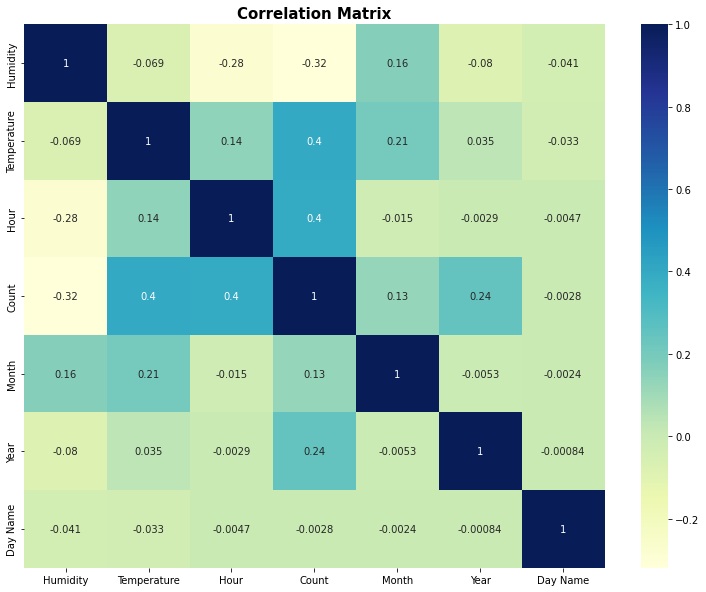

In [19]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_model[num_features].corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix', size=15, weight='bold');
plt.show()

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur Count. Korelasi paling tinggi dimiliki oleh fitur 'Temperature' dan 'Hour, di mana korelasinya adalah korelasi positif. Ini berarti semakin ke besar temperature dan hour, maka jumlah persewaan pun semakin banyak.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

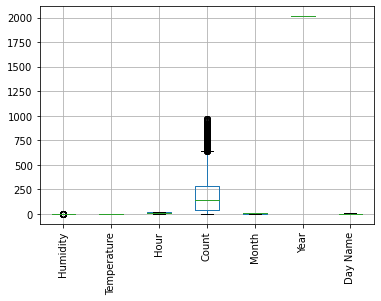

In [20]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

In [21]:
# Membuat fungsi untuk mengecek outliers
def cek_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [22]:
# Outliers pada fitur humidity
cek_outliers(df_model['Humidity'])

IQR: 0.31000000000000005
limit_bawah: 0.004999999999999893
limit_atas: 1.245


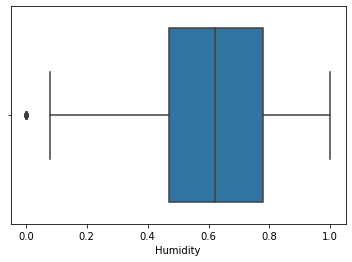

In [23]:
sns.boxplot(df_model['Humidity'])
plt.show()

In [24]:
# Outliers pada fitur temperature
cek_outliers(df_model['Temperature'])

IQR: 0.32
limit_bawah: -0.13999999999999996
limit_atas: 1.1400000000000001


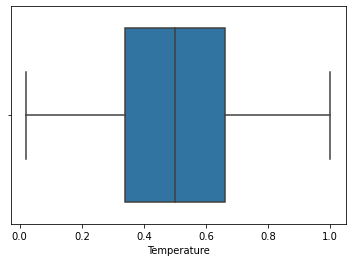

In [25]:
sns.boxplot(df_model['Temperature'])
plt.show()

In [26]:
# Outliers pada fitur count
cek_outliers(df_model['Count'])

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


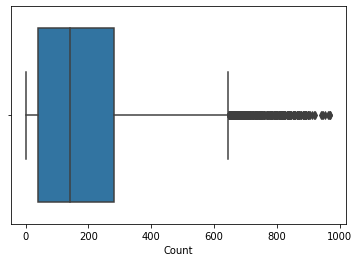

In [27]:
sns.boxplot(df_model['Count'])
plt.show()

Terdapat outliers pada fitur Humidity dan Count. Untuk mengatasinya, akan dihilangkan data outliers tersebut. Nantinya, prediksi dapat dilakukan pada rentang data sesuai dataset yang bersih saja agar hasil prediksi tidak menjadi bias.

Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**Humidity**

In [28]:
# Cek deskriptif statistik kolom humidity
df_model['Humidity'].describe()

count    12165.000000
mean         0.625451
std          0.192102
min          0.000000
25%          0.470000
50%          0.620000
75%          0.780000
max          1.000000
Name: Humidity, dtype: float64

In [29]:
# Cek humidity not between 0.004999999999999893 and 1.245
df_model[(df_model['Humidity'] > 1.245) | (df_model['Humidity'] < 0.004999999999999893)].count()['Humidity']

14

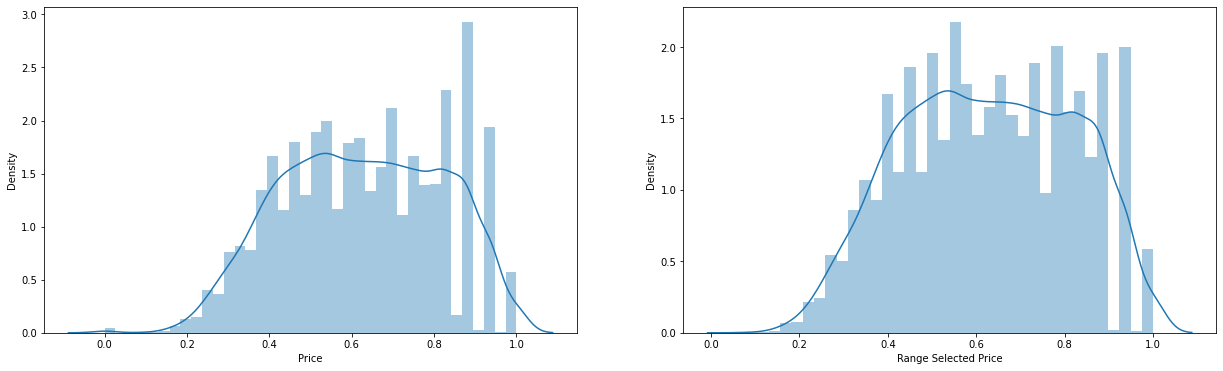

In [30]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Humidity'] <= 1.245) & (df_model['Humidity'] >= 0.004999999999999893)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['hum'], ax=axes[0])
sns.distplot(df_model['Humidity'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [31]:
# Cek deskriptif statistik kolom 'Humidity' setelah filtering
df_model['Humidity'].describe()

count    12151.000000
mean         0.626172
std          0.191036
min          0.080000
25%          0.480000
50%          0.620000
75%          0.780000
max          1.000000
Name: Humidity, dtype: float64

**Temperature**

In [32]:
# Cek deskriptif statistik kolom Temperature Feel
df_model['Temperature'].describe()

count    12151.000000
mean         0.498313
std          0.192562
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: Temperature, dtype: float64

In [33]:
# Cek Temperature Feel not between -0.09854999999999997 and 1.0530499999999998
df_model[(df_model['Temperature'] > 1.0530499999999998) | (df_model['Temperature'] < -0.09854999999999997)].count()['Temperature']

0

**Count**

In [34]:
# Cek deskriptif statistik kolom Count
df_model['Count'].describe()

count    12151.000000
mean       189.457329
std        181.242898
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: Count, dtype: float64

In [35]:
# Cek Count not between -323.0 and 645.0
df_model[(df_model['Count'] > 645.0) | (df_model['Count'] < -323.0)].count()['Count']

338

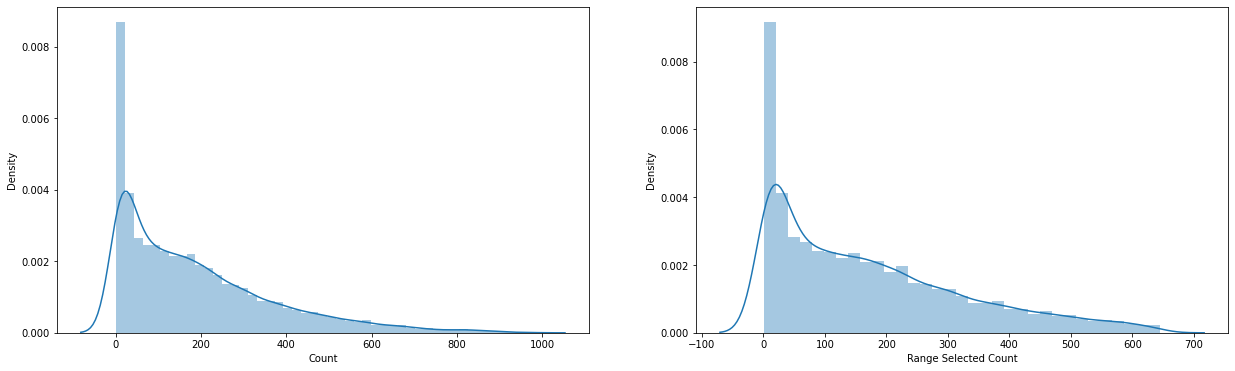

In [36]:
# # Melakukan filtering pada data
df_model = df_model[(df_model['Count'] <= 645.0) & (df_model['Count'] >= -323.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['cnt'], ax=axes[0])
sns.distplot(df_model['Count'], ax=axes[1])
axes[0].set_xlabel('Count')
axes[1].set_xlabel('Range Selected Count');

In [37]:
# # Cek deskriptif statistik kolom 'Count' setelah filtering
df_model['Count'].describe()

count    11813.000000
mean       173.384238
std        155.931763
min          1.000000
25%         38.000000
50%        136.000000
75%        267.000000
max        645.000000
Name: Count, dtype: float64

**Clean Dataset**

In [38]:
df_model.head()

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Month,Year,Day Name
0,0.62,1,0,4,0.36,16,250,12,2011,4
1,0.64,1,0,2,0.54,4,18,6,2012,6
2,0.53,1,0,2,0.62,23,107,6,2011,2
3,0.87,2,0,2,0.36,8,145,3,2012,5
5,0.72,1,0,4,0.46,0,45,10,2012,0


Setelah data dibersihkan, tersisa 11813 data yang akan digunakan untuk pemodelan. Ini berarti 3% data telah dihapus d proses sebelumnya.

## **Modeling**

In [39]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [40]:
df_model.describe(include='all')

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Month,Year,Day Name
count,11813.000000,11813.0,11813.0,11813.0,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000
unique,NaN,4.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7802.0,11452.0,3043.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.629196,NaN,NaN,NaN,0.494350,11.438585,173.384238,6.487514,2011.488360,3.014983
std,0.190793,NaN,NaN,NaN,0.192538,6.979256,155.931763,3.455726,0.499886,1.999457
min,0.080000,NaN,NaN,NaN,0.020000,0.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.480000,NaN,NaN,NaN,0.340000,5.000000,38.000000,3.000000,2011.000000,1.000000
50%,0.630000,NaN,NaN,NaN,0.500000,11.000000,136.000000,6.000000,2011.000000,3.000000
75%,0.790000,NaN,NaN,NaN,0.660000,18.000000,267.000000,9.000000,2012.000000,5.000000


**Encoding**

Target: Count

Passthrough: Humidity, Temperature, Hour, Month, Year

OneHotEncoding: Season, Weather, Holiday

BinaryEncoding: Day Name


In [41]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['Season', 'Weather', 'Holiday']),
    ('Binary', ce.BinaryEncoder(), ['Day Name'])
], remainder='passthrough')

**Data Splitting**

In [42]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Count'], axis=1)
y = df_model['Count']

**Train & Test Splitting**

In [43]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=2009)

In [44]:
# df_model

**Choose a Benchmark Model**

In [45]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2009)
rf = RandomForestRegressor(random_state=2009)
xgb = XGBRegressor(random_state=2009)

In [46]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_msle = []
nilai_mean_msle = []
nilai_std_msle = []

# Mencari algoritma terbaik berdasarkan nilai MAE, MAPE, RMSE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())
    
    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-140.19622033 -142.66233693 -138.40702762 -145.31501764 -153.67892468] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -95.21657615  -97.224386    -95.0739298   -97.28117804 -105.33533868] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.41972731 -1.25857911 -1.42418122 -1.42787427 -1.41011789] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -92.63751287  -94.15482027  -88.47645779  -99.15097761 -105.28513102] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-59.03957042 -59.66229447 -57.19948093 -61.17964359 -66.04012013] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRe

In [47]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse
})

,Model,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_RMSE,Std_RMSE
0,Linear Regression,-98.026282,3.774423,-1.388096,0.065030,-144.051905,5.346715
1,KNN Regressor,-60.624222,2.993517,-0.854195,0.075980,-95.940980,5.786875
2,DecisionTree Regressor,-37.238253,0.825947,-0.416354,0.023056,-63.312522,2.453591
3,RandomForest Regressor,-27.854651,1.612978,-0.291024,0.013921,-46.222224,3.133668
4,XGBoost Regressor,-26.303062,1.356215,-0.264554,0.016453,-43.072140,2.699228


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

Berdasarkan nilai ketiga matriks tersebut, XGBoost adalah model terbaik. Selanjutnya, akan dilakukan prediksi test set dengan model XGBoost.

**Penjelasan Singkat XGBoost**

Gradient boosting adalah algoritma supervised learning yang dapat memprediksi variabel target secara akurat dengan mengkombinasikan perkiraan satu set model yang lebih sederhana dan lemah. Saat menggunakannya untuk regresi, pembelajaran yang lemah adalah regression tree, setiap regression tree memetakan input data point ke salah satu daun yang berisi continuous score.

Jika Random forest dapat dianalogikan dengan sekelompok orang yang bermusyawarah untuk membuat keputusan. Masing - masing orang membuat keputusan berdasarkan pengetahuannya. Setelah semua orang membuat keputusan, hasil akhirnya akan dipilih berdasarkan voting terbanyak.

Maka untuk gradient boosting, dapat dianalogikan dengan sekelompok orang dimana setiap orangnya mencoba menyelesaikan kesalahan yang dibuat oleh seseorang yang sebelumnya telah membuat keputusan. Kemudian mereka mencoba menemukan solusi terbaik untuk masalah tersebut.

XGBoost adalah singkatan dari Extreme Gradient Boosting, model ini memiliki kinerja yang baik karena penanganan yang robust (kuat) untuk berbagai jenis tipe data, hubungan, distribusi, dan berbagai hyperparameter yang dapat di tune. XGBoost dapat digunakan untuk regresi, klasifikasi, dan ranking problems.

XGBoost meminimalkan fungsi objektif yang diregularisasi (L1 dan L2) yang menggabungkan convex loss function (berdasarkan selisih antara output target dan prediksi) dan penalty term untuk kompleksitas model (dengan kata lain, fungsi regression tree). Trainingnya berulang, menambahkan tree baru yang memprediksi residual atau error dari tree sebelumnya yang dikombinasikan dengan pohon sebelumnya untuk menghasilkan prediksi akhir. Disebut gradient boosting karena menggunakan algoritma turunan dari gradient untuk meminimalkan kerugian saat menambahkan model baru.

Penjelasan lain terkait XGBoost : https://medium.com/about-developer-blog/xgboost-gone-wild-predicting-returns-with-extreme-gradient-boosting-3e2c16c5bc01



**Predict to Test Set with the Benchmark Model**

In [48]:
# Benchmark model terbaik
models = {
    'XGB': XGBRegressor(random_state=2009),
}

score_mae = []
score_mape = []
score_rmse = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'RMSE': score_rmse}, index=models.keys())
score_before_tuning

,MAE,MAPE,RMSE
XGB,25.660473,0.417682,40.253471


Ketika dilakukan prediksi pada test set, performa XGBoost juga cukup baik dan tidak memiliki berbedaan signifikan dengan train set. Sehingga, dapat diartikan bahwa model tidak mengalami overfitting atau underfitting.

**Hyperparameter Tuning**

Selanjutnya, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Berikut ini panduan dan beberapa tips untuk XGBoost Hyperparameter Tuning :

https://xgboost.readthedocs.io/en/latest/parameter.html

https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

In [49]:
# Kedalaman pohon. Semakin dalam kemungkinan meningkatkan performance, namun juga kompleksitas dan kemungkinan overfit.
# value integer > 0. Defaultnya 6.
max_depth = list(np.arange(5, 16)) # 5 - 15

# Learning rate. Menentukan ukuran step pada tiap iterasi sementara model mengoptimalkan ke arah tujuannya.
# Learning rate rendah membuat komputasi lebih lambat, dan perlu lebih banyak putaran untuk mencapai pengurangan di
# residual error yang sama seperti model dengan learning rate tinggi. Namun akan mengoptimalkan peluang untuk mencapai best optimum.
# Nilainya 0 - 1. Defaultnya 0,3.
learning_rate = list(np.arange(1, 10)/10) # 0.1 - 0.9

# Jumlah pohon di ensemble. Ekuivalen dengan total round dari boosting.
# value integer > 0. Defaultnya 100.
n_estimators = list(np.arange(100, 300)) # 100 - 299

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set). Mewakili kolom yang akan diambil samplenya
# secara acak untuk tiap tree. Kemungkinan dapat meningkatkan overfitting.
# value antara 0 - 1. Defaultnya 1.
colsample_bytree = list(np.arange(1, 10)/10) # 0.1 - 0.9

# Jumlah baris tiap pohon (% dari total baris train set). Mewakili feaction observations yang akan dijadikan sample per tree.
# Nilai lebih rendah dapat mencegah overfitting tapi bisa menyebabkan underfitting.
# value antara 0 - 1. Defaultnya 1.
subsample = list(np.arange(1, 10)/10) # 0.1 - 0.9

# Alpha. L1 regularization pada weights (Lasso Regression). Dapat meningkatkan speed performance saat featurenya banyak.
# Semakin besar nilainya, semakin konservatif/simpel modelnya
# Defaultnya 0.
reg_alpha = list(np.logspace(-1, 1, 10)) # 0.1 - 10

# Lambda. L2 regulatization pada weights (Ridge Regression). Dapat menurunkan overfitting.
# Defaultnya 1.
reg_lambda = list(np.logspace(-1, 1, 10)) # 0.1 - 10

# Gamma (min_impurity_decrease). Pseudo-regulatization parameter, bergantung pada parameter lainnya.
# Semakin besar nilainya, semakin konservatif/simpel modelnya.
# Integer berapapun. Defaultnya 0.
gamma = list(np.arange(5, 16)) # 5 - 15

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__reg_lambda': reg_lambda
}

In [50]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=2009, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 2009  
)

In [51]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Season',
                                                                                'Weather',
                                                                                'Holiday']),
                                                                              ('Binary',
                

In [52]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAE, MAPE, RMSE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_lambda,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,...,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
31,7.667497,0.150102,0.102838,0.008501,0.4,5.994843,0.1,215,15,0.1,...,0.019888,1,-37.701355,-41.291522,-39.249729,-41.948774,-43.106209,-40.659518,1.938357,1
23,8.304629,0.285886,0.094947,0.003302,0.9,2.154435,10.0,202,15,0.1,...,0.025816,2,-38.091620,-42.562103,-39.926687,-42.807302,-44.818364,-41.641215,2.359716,2
38,6.382426,0.119140,0.075198,0.004019,0.6,2.154435,1.29155,275,10,0.1,...,0.036988,3,-39.345120,-42.190639,-40.144214,-43.095715,-44.392022,-41.833542,1.860779,3
49,4.967441,0.081252,0.069860,0.012536,0.7,10.0,0.1,228,15,0.1,...,0.030627,6,-41.672058,-45.501788,-43.322922,-44.329485,-44.954528,-43.956156,1.352271,4
33,5.568708,0.200000,0.079596,0.013774,0.9,10.0,5.994843,162,14,0.4,...,0.041212,5,-41.845992,-45.118278,-42.489219,-44.270730,-46.849719,-44.114787,1.805606,5


In [53]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -40.65951776406382
Best_params: {'model__subsample': 0.4, 'model__reg_lambda': 5.994842503189409, 'model__reg_alpha': 0.1, 'model__n_estimators': 215, 'model__max_depth': 15, 'model__learning_rate': 0.1, 'model__gamma': 14, 'model__colsample_bytree': 0.8}


**Predict Test Set With Tuned Model**

In [54]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=2009)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'RMSE': rmse_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE,RMSE
XGB,24.974991,0.435097,39.128779


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [55]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,MAE,MAPE,RMSE
XGB,25.660473,0.417682,40.253471


In [56]:
score_after_tuning

,MAE,MAPE,RMSE
XGB,24.974991,0.435097,39.128779


Dapat dilihat bahwa setelah dilakukan hyperparameter tuning, model mengalami peningkatan performa.

RMSE, MAE & MAPE sebelum tuning: 40.25, 25.66, 0.41
RMSE, MAE & MAPE setelah tuning: 39.12, 24.97, 0.43

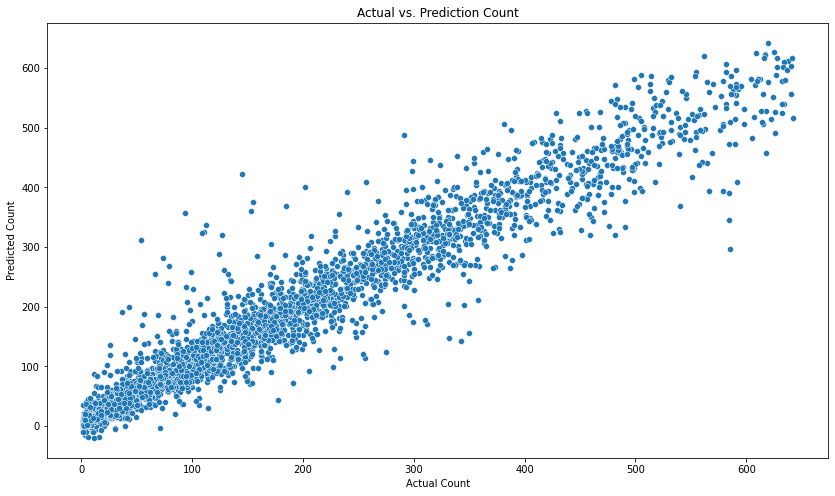

In [57]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count');

Dari scatterplot diatas, terlihat bahwa hasil prediksi yang diperoleh cukup baik. Namun masih terdapat kemungkinan bias.

**Feature Importance**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (Count), kita dapat mengeceknya melalui function feature_importances_.

In [58]:
# transformer.get_feature_names()

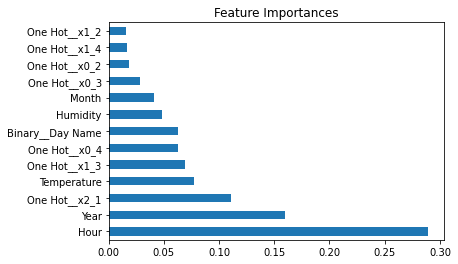

In [59]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');

# Conclusion & Recommendation

Berdasarkan pemodelan yang telah dilakukan, fitur 'Hour' merupakan fitur yang paling berpengaruh terhadap 'Count'. 

Untuk matriks evaluasi yang digunakan adalah RMSE, MAE, dan MAPE. Nilai RMSE yang dihasilkan setelah hyperparameter tuning adalah 39,12. Sehingga dapat disimpulkan bahwa jika model akan digunakan untuk memperkirakan penyewa sepeda pada rentang nilai sesuai model yang dilatih (maksimal Count 645), maka perkiraan penyewa dapat meleset kurang lebih 39 orang dari total aktualnya. Namun dapat terjadi kesalahan lebih jauh juga karena masih terdapat bias yang terlihat dari visualisasi data prediksi dan aktual. Bias dapat terjadi karena masih kurangnya fitur pada dataset untuk merepresentasikan keadaan dimana orang akan memutuskan untuk menyewa sepeda, seperti lokasi station, adanya event tertentu, dan lain - lain.

Rekomendasi yang dapat dilakukan untuk pengembangan model yang lebih baik, seperti :

 1. Penambahan fitur yang lebih korelatif dengan target ('Count') seperti adanya event tertentu dan jarak lokasi station dengan lokasi perkantoran, sekolah, atau tempat wisata.
 
 2. Penambahan data. Jika terdapat data lebih banyak dan lebih dari dua tahun, dapat dianalisis lebih baik lagi keterkaitan tahun dengan Count. Dapat juga digunakan model yang lebih kompleks untuk proses pemodelannya untuk dibandingan dan dicari model dengan error paling sedikit.
 
 3. Model yang telah dibangun juga dapat dimanfaatkan untuk pengembangan lainnya. Misalnya pembuatan model untuk memprediksi harga rental atau pembuatan model untuk memprediksi jumlah sepeda yang keluar atau masuk di station tertentu. Jika ada, dapat dianalisis lokasi station strategis, dan dapat menjadi sebuah pertimbangan untuk membuka station baru di tempat yang serupa.

# Save Model

In [60]:
# Save model
import pickle

# final_model = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# final_model.fit(X_train, y_train)
final_model = random_xgb.best_estimator_.fit(X_train, y_train)

pickle.dump(final_model, open('Model_XGB_BikeSharing.sav', 'wb'))

In [61]:
# Load model
filename = 'Model_XGB_BikeSharing.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [62]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

39.12877918888594